## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

[see Lecture04-DaynamicProgramming.ipyn](Lecture04-DaynamicProgramming.ipynb)

### Part1-2: Finish the Solution Parse Part of Edit-Distance
[see Lecture04-DaynamicProgramming.ipyn](Lecture04-DaynamicProgramming.ipynb)

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑快与画家
+ 数学之美
+ Fluent Python 
+ Hands on Tensorflow 
+ Conference: *NIPS ICML ICLR ACL AAAI*

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problem? 

Ans:动态规划通过将问题分解成子问题，用递归的方式求解子问题的最优解，从而得到原始问题的最优解。使用动态规划能顾帮助我们更加快速的找到问题的最优解，适用于解空间较大的问题。

搜索方法是从原始问题出发自上而下搜索出所有的解，并通过比较找到最优解；动态规划是通过递归的方式自底向上获得问题的最优解；

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:机器学习方法需要使用数据去拟合目标函数，对数据集的依赖较大，但是一些问题本身可能并没有积累到一定量的原始数据，因此机器学习可能并不是最优的方法； 其次机器学习方法寻找的是问题的近似解，而动态规划求解的是问题的解析解即最优解。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans: 外卖小哥送货路径选择问题；航班路线规划问题；策略类游戏；

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: google搜索时提供的近似索搜索条目；文章/论文查重；编辑器拼写检查；

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans: 
- 寻找重复的子问题：分析问题的求解过程，用公式表示出父问题和子问题的关系；
- 存储子问题的解：计算子问题的解并保存起来，方便父问题使用；
- 解析最优解：第二步存储的解包括所有子问题的解，需要从中提取中最优解的分解过程；

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:
- 耗费内存，需要存储大量的中间结果以及使用递归算法本身的内存开销；
- 没有通用的求解方案，每个问题都要具体分析；



## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

----
### (Optinal) Finish the salesman problem: （2维 DP问题）

In [170]:
import random
import numpy as np
from math import sqrt
from functools import lru_cache
from collections import defaultdict
import time

In [171]:
# 随机生成坐标点
random.seed(1)
point_length = 5
latitudes = [random.randint(-100, 100) for _ in range(point_length)]
longitude = [random.randint(-100, 100) for _ in range(point_length)]

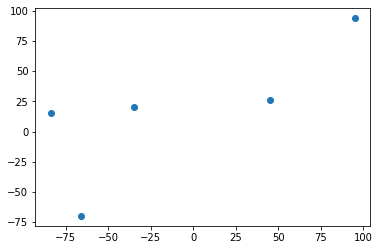

In [172]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 经过所有点全部一次，而且所走过的路程最短? 

例如： 

In [173]:
# 随机选择起点坐标
chosen_p = (5, 10)

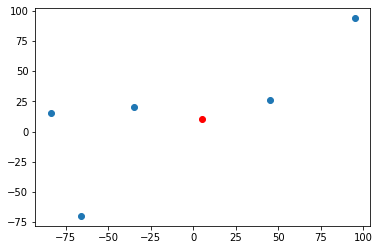

In [174]:
# 起点坐标用红色表示
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

### 求解

+ 由问题抽象出递归公式： 

$$ T(\text{init}, s) = \min(T(i, s-i) + \text{dist}(\text{init}, i) )$$


+ 假设有4个点{0, 1, 2, 3}, 从0出发，根据递归公式有：
```
T(0, {1, 2, 3}) = min(
                        T(1, {2, 3}) + dist(0, 1), 
                        T(2, {1, 3}) + dist(0, 2), 
                        T(3, {1, 2}) + dist(0, 3)
                      ) 
```



In [175]:
# 随机选择起点坐标
point_list = [(x, y) for x, y in zip(latitudes, longitude)]
point_list.insert(0, chosen_p)
point_array = np.array(point_list)

# 计算所有坐标点的距离矩阵
dist = np.zeros((point_array.shape[0], point_array.shape[0]))
for i in range(point_array.shape[0]):
    for j in range(point_array.shape[0]):
        dist[i, j] = sqrt(np.sum((point_array[i, :] - point_array[j, :]) ** 2))
print('dist matrix init:\n', dist)

dist matrix init:
 [[  0.         106.96261029  43.08131846 123.10970717  89.14033879
   41.23105626]
 [106.96261029   0.         146.7548977  229.81949439  86.88498144
   95.18928511]
 [ 43.08131846 146.7548977    0.          84.40379138 129.4681428
   80.22468448]
 [123.10970717 229.81949439  84.40379138   0.         195.65786465
  149.58609561]
 [ 89.14033879  86.88498144 129.4681428  195.65786465   0.
   49.25444142]
 [ 41.23105626  95.18928511  80.22468448 149.58609561  49.25444142
    0.        ]]


In [176]:
# @lru_cache(maxsize=2**10)
def TSP(start, site_list):
    """
    :param start: start point index
    :param site_list: all site list
    :return:
    """
    global solution
    if all(e == 1 for e in site_list):
        return 0

    dist_list = np.full(site_list.shape, np.inf)
    for site_index, site in enumerate(site_list):
        if site == 1 or site_index == start:
            continue
        site_list[site_index] = 1
        dist_list[site_index] = TSP(site_index, site_list) + dist[start, site_index]
        site_list[site_index] = 0
    
    index_min = np.argmin(dist_list)
    solution[(str(start), ''.join(str(e) for e in site_list))] = index_min
    return dist_list[index_min]

In [177]:
# 定义遍历坐标点的flag数组，已遍历的点flag为1
init_site_list = np.zeros(point_array.shape[0], dtype=int)
init_site_list[0] = 1
solution = defaultdict()
result = TSP(0, init_site_list)
print('Min distance: %.2f' % result)

Min distance: 407.73


In [178]:
solution

defaultdict(None,
            {('4', '111110'): 5,
             ('5', '111101'): 4,
             ('3', '111100'): 5,
             ('3', '111110'): 5,
             ('5', '111011'): 3,
             ('4', '111010'): 5,
             ('3', '111101'): 4,
             ('4', '111011'): 3,
             ('5', '111001'): 4,
             ('2', '111000'): 3,
             ('2', '111100'): 5,
             ('2', '111110'): 5,
             ('5', '110111'): 2,
             ('4', '110110'): 5,
             ('2', '111101'): 4,
             ('4', '110111'): 2,
             ('5', '110101'): 4,
             ('3', '110100'): 2,
             ('2', '111010'): 5,
             ('3', '110110'): 2,
             ('2', '111011'): 3,
             ('3', '110111'): 2,
             ('5', '110011'): 2,
             ('4', '110010'): 5,
             ('2', '111001'): 3,
             ('3', '110101'): 2,
             ('4', '110011'): 2,
             ('5', '110001'): 4,
             ('1', '110000'): 4,
             ('1', '11100

In [179]:
# 解析Solution
def parse_solution(start, site_list, solution):
    if all(e == 1 for e in site_list):
        return [start]
    
    key = (str(start), ''.join(str(e) for e in site_list))
    next_point = solution[key]
    
    site_list[next_point] = 1
    next_key = (str(next_point), ''.join(str(e) for e in site_list))
    return parse_solution(next_point, site_list, solution) + [start]

In [180]:
init_site_list = np.zeros(point_array.shape[0], dtype=int)
init_site_list[0] = 1
min_path = parse_solution(0, init_site_list, solution)[::-1]
print('Min path:', min_path)

Min path: [0, 1, 4, 5, 2, 3]


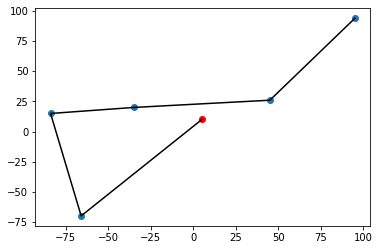

In [181]:
# 可视化展示结果
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
x = [point_array[point][0] for point in min_path]
y = [point_array[point][1] for point in min_path]
plt.plot(x, y, color='black')